# Import library


In [2]:
# Import necessary libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage
import os

# Load image


Counting\cat.jpg
Loaded: cat.jpg
Counting\mouse.jpg
Loaded: mouse.jpg
Counting\pair_boot.jpg
Loaded: pair_boot.jpg
Counting\rabbit.jpeg
Loaded: rabbit.jpeg
Counting\rabbit2.png
Loaded: rabbit2.png
Loaded 5 images from Counting folder.

Finding\1.jpg
Loaded: 1.jpg
Finding\2.jpg
Loaded: 2.jpg
Finding\3.jpg
Loaded: 3.jpg
Finding\boat_t.png
Loaded: boat_t.png
Finding\image.jpg
Loaded: image.jpg
Loaded 5 images from Finding folder.
Template/find\baloon.jpg
Loaded: baloon.jpg
Template/find\bear.jpg
Loaded: bear.jpg
Template/find\boat.jpg
Loaded: boat.jpg
Template/find\cake.jpg
Loaded: cake.jpg
Template/find\car.jpg
Loaded: car.jpg
Template/find\dau.jpg
Loaded: dau.jpg
Template/find\duck.jpg
Loaded: duck.jpg
Template/find\grape.jpg
Loaded: grape.jpg
Template/find\horse.jpg
Loaded: horse.jpg
Template/find\ice_cream.jpg
Loaded: ice_cream.jpg
Template/find\no.jpg
Loaded: no.jpg
Template/find\rabit.jpg
Loaded: rabit.jpg
Template/find\tenis.jpg
Loaded: tenis.jpg
Template/find\train.jpg
Loaded: tra

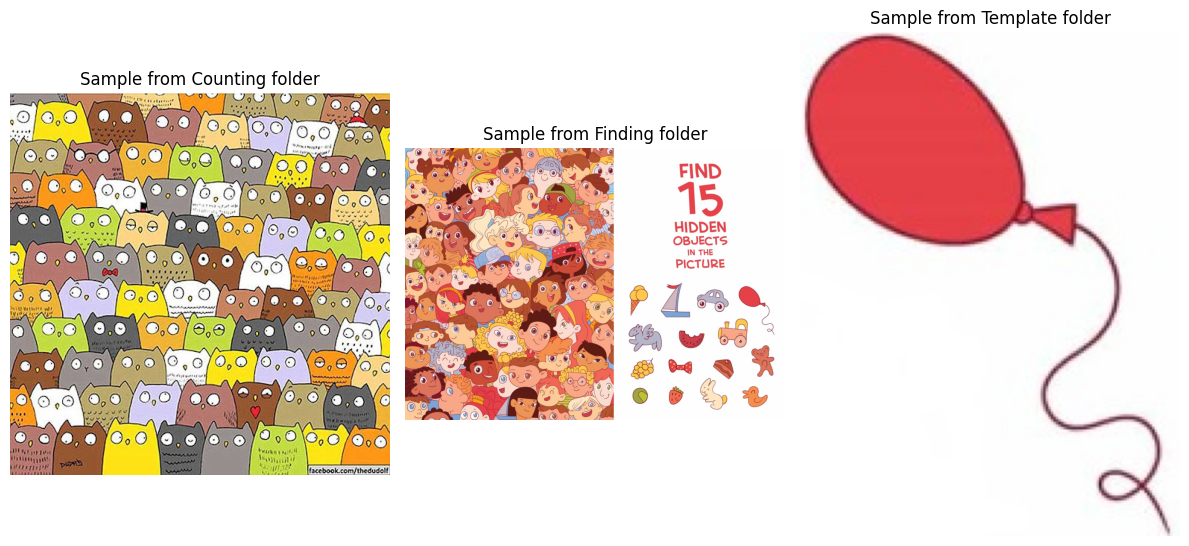

In [3]:
images_counting = []
images_finding = []
template = []

# Function to read all images from a folder
def read_images_from_folder(folder_path):
    images = []
    for filename in os.listdir(folder_path):
        # Check if the file is an image (you can add more extensions if needed)
        if filename.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.tiff')):
            img_path = os.path.join(folder_path, filename)
            print(img_path)
            img = cv2.imread(img_path)
            if img is not None:
                # Convert from BGR to RGB for display purposes
                img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
                images.append(img_rgb)
                print(f"Loaded: {filename}")
            else:
                print(f"Failed to load: {filename}")
    return images

# Define paths to the Counting and Finding folders
counting_folder_path = "Counting"
finding_folder_path = "Finding"
template_folder_path = "Template/find"

# Load images from both folders
# print("Loading images from Counting folder...")
images_counting = read_images_from_folder(counting_folder_path)
print(f"Loaded {len(images_counting)} images from Counting folder.\n")

# print("Loading images from Finding folder...")
images_finding = read_images_from_folder(finding_folder_path)
print(f"Loaded {len(images_finding)} images from Finding folder.")

# print("Loading template images...")
template = read_images_from_folder(template_folder_path)
print(f"Loaded {len(template)} template images from Template folder.\n")


# Display a sample image from each folder if available
plt.figure(figsize=(12, 6))

if len(images_counting) > 0:
    plt.subplot(1, 3, 1)
    plt.imshow(images_counting[0])
    plt.title("Sample from Counting folder")
    plt.axis('off')

if len(images_finding) > 0:
    plt.subplot(1, 3, 2)
    plt.imshow(images_finding[0])
    plt.title("Sample from Finding folder")
    plt.axis('off')

if len(template) > 0:
    plt.subplot(1, 3, 3)
    plt.imshow(template[0])
    plt.title("Sample from Template folder")
    plt.axis('off')


plt.tight_layout()
plt.show()

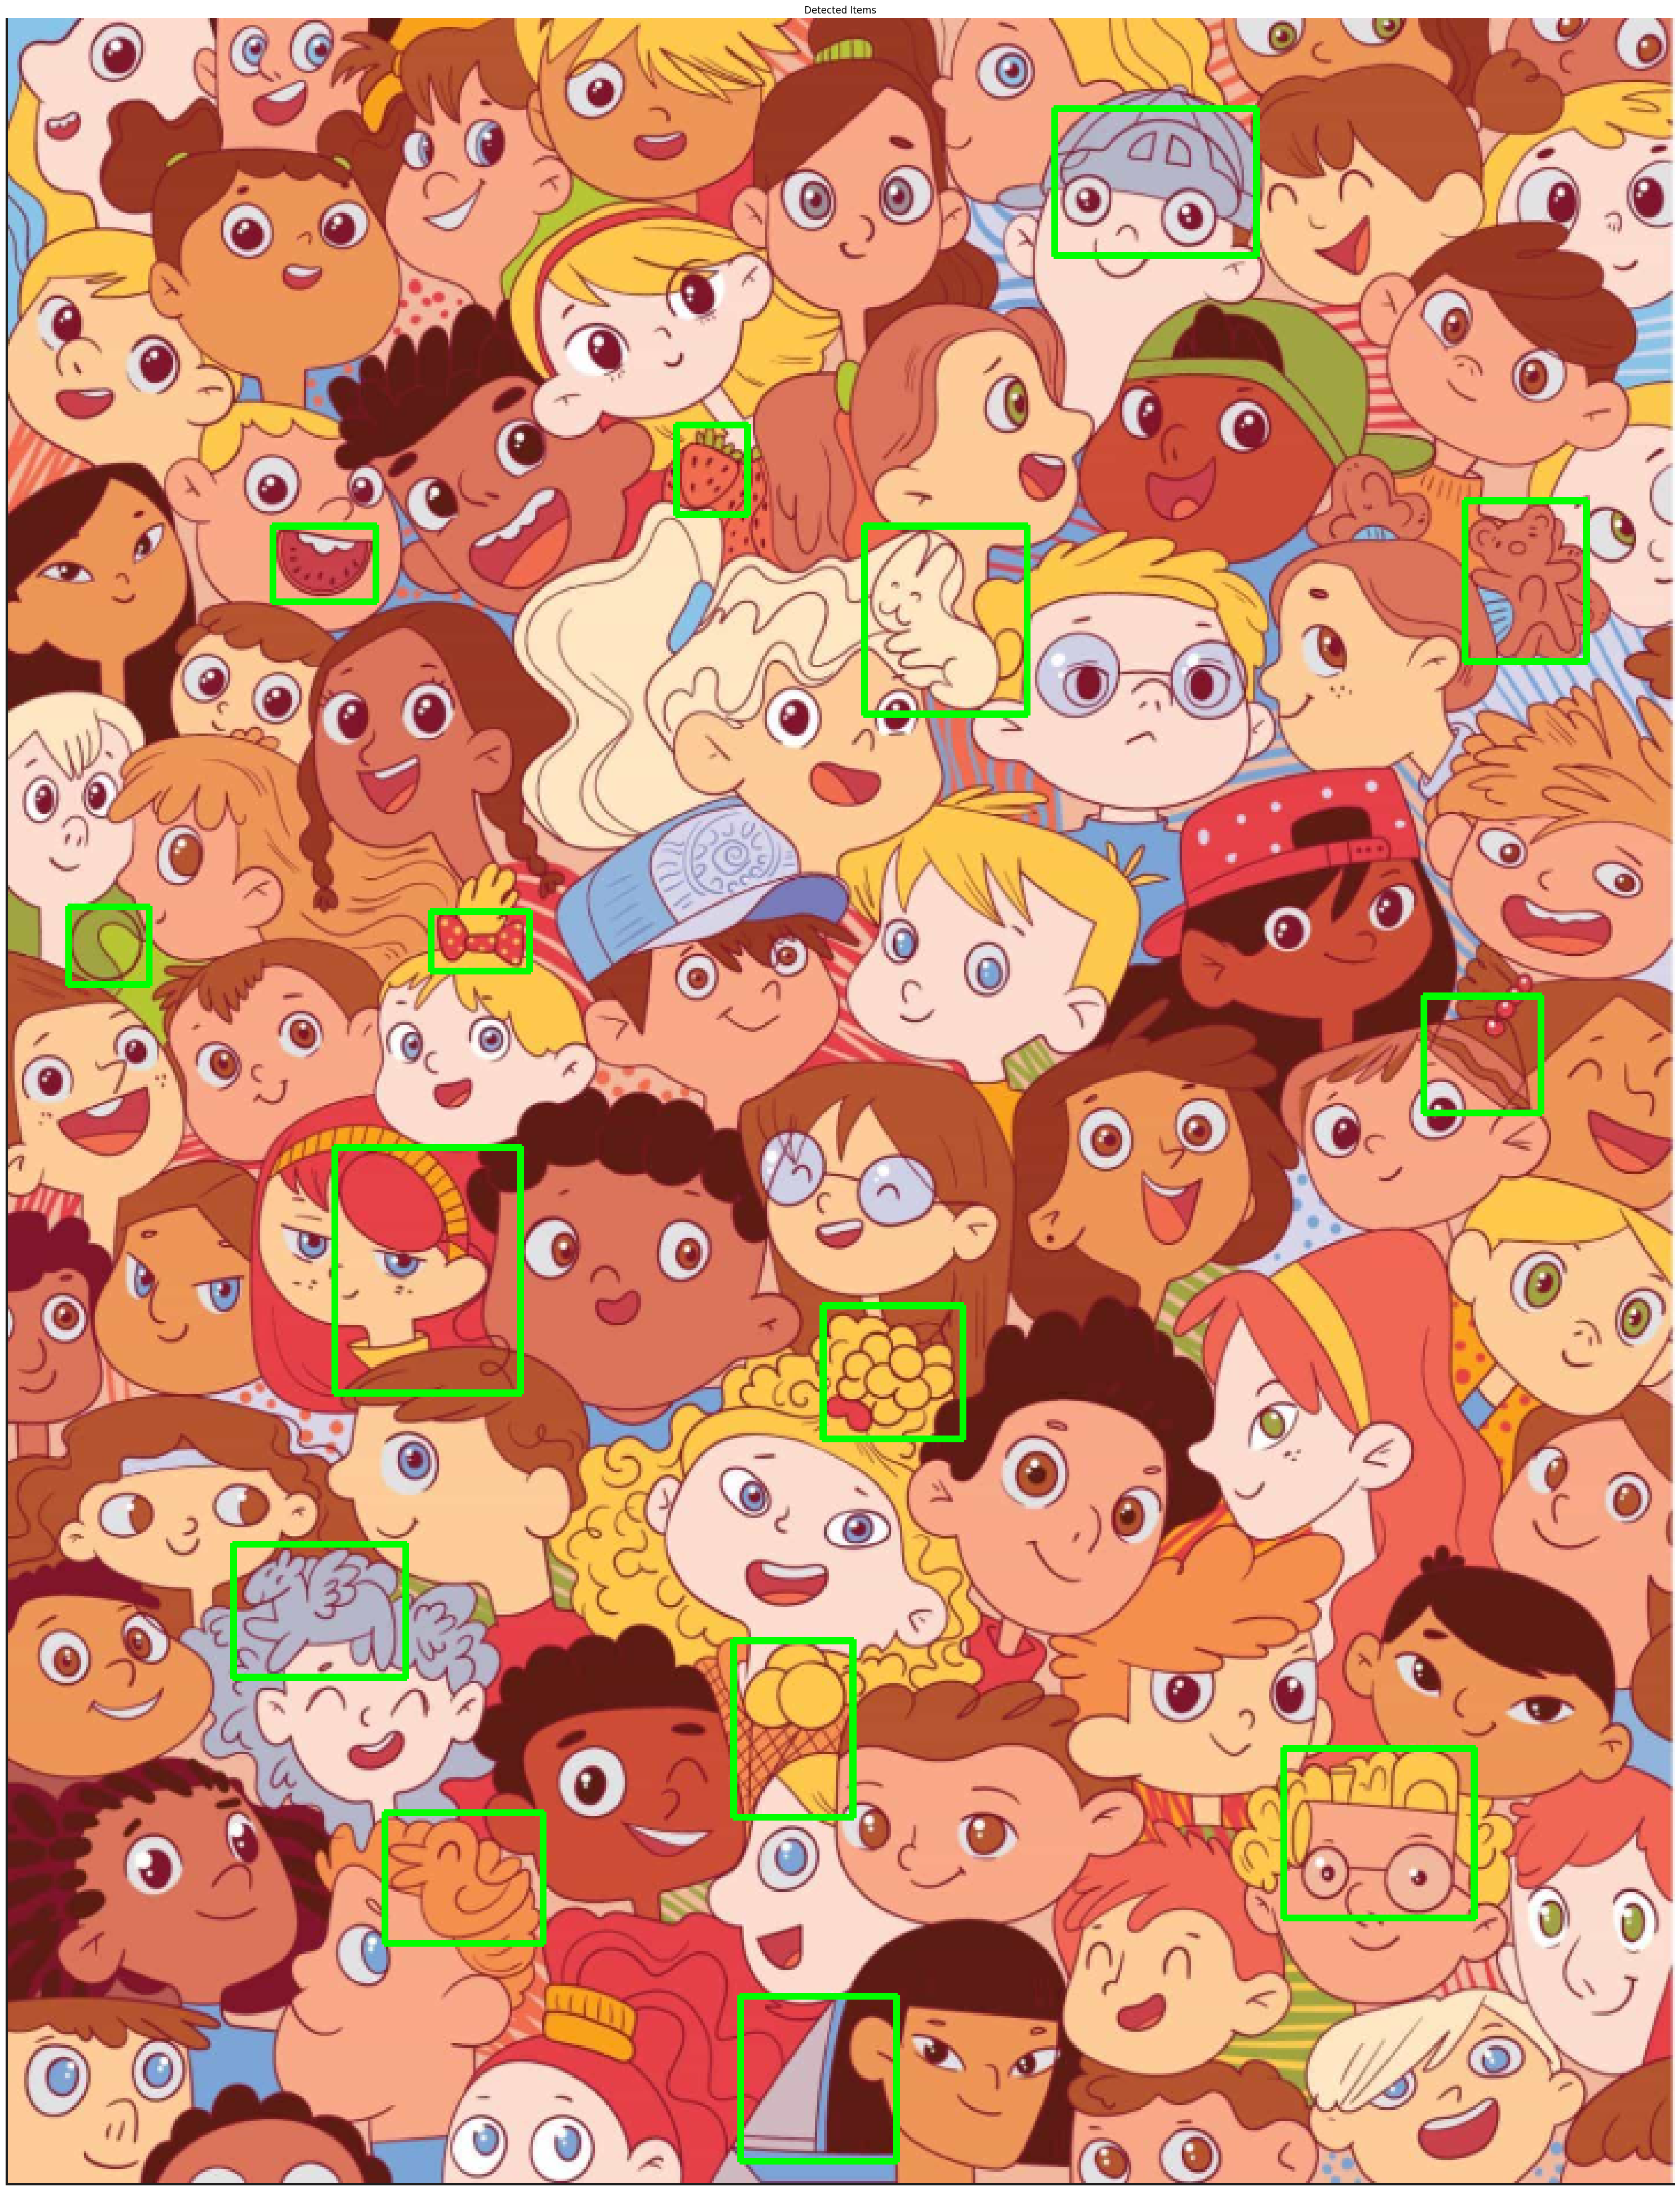

True

In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def find_items(image_path, template_path, scale_range=(0.5, 1), scale_step=0.01):
    # Đọc ảnh chính và template
    image = cv2.imread(image_path)
    template = cv2.imread(template_path)
    
    # Chuyển ảnh sang grayscale
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    gray_template = cv2.cvtColor(template, cv2.COLOR_BGR2GRAY)
    
    # Áp dụng Canny Edge Detection
    edges_image = cv2.Canny(gray_image, 50, 150)
    
    best_match = None
    best_val = -np.inf
    best_rect = None
    
    # Duyệt qua các tỷ lệ
    for scale in np.arange(scale_range[0], scale_range[1], scale_step):
        resized_template = cv2.resize(gray_template, None, fx=scale, fy=scale, interpolation=cv2.INTER_LINEAR)
        edges_template = cv2.Canny(resized_template, 50, 200)
        
        result = cv2.matchTemplate(edges_image, edges_template, cv2.TM_CCOEFF_NORMED)
        min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(result)
        
        if max_val > best_val:
            best_val = max_val
            best_match = max_loc
            h, w = resized_template.shape
            best_rect = (best_match, (best_match[0] + w, best_match[1] + h))
    
    # Vẽ hình chữ nhật lên vị trí tìm được tốt nhất
    # if best_rect:
    #     cv2.rectangle(image, best_rect[0], best_rect[1], (0, 255, 0), 2)
    
    return image, best_val, best_rect
    # Hiển thị kết quả
    # cv2.imshow('Detected Items', image)
    # cv2.waitKey(0)
    # cv2.destroyAllWindows()


def draw_rectangle(image, rect):
    if rect:
        cv2.rectangle(image, rect[0], rect[1], (0, 255, 0), 2)
    return image


lis_cordinate = []


# images = []
# for filename in os.listdir(folder_path):
#     # Check if the file is an image (you can add more extensions if needed)
#     if filename.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.tiff')):
#         img_path = os.path.join(folder_path, filename)
#         print(img_path)
#         img = cv2.imread(img_path)
#         if img is not None:
#             # Convert from BGR to RGB for display purposes
#             img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
#             images.append(img_rgb)
#             print(f"Loaded: {filename}")
#         else:
#             print(f"Failed to load: {filename}")
# return images
template_find_path = "Template/find"
for filename in os.listdir(template_find_path):
    path_template = os.path.join(template_find_path, filename)
    final_image, _, cordinate = find_items("Finding/image.jpg", path_template)
    if cordinate is not None:
        lis_cordinate.append(cordinate)

for cordinate in lis_cordinate:
    final_image = draw_rectangle(final_image, cordinate)

final_image = cv2.cvtColor(final_image, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(50, 50))
plt.imshow(final_image)
plt.title("Detected Items")
plt.axis('off')
plt.show()

cv2.imwrite("output.jpg", final_image)